# Human Activity Recognition data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
def load_file(filepath):
  df = pd.read_csv(filepath, header=None, delim_whitespace=True)
  return df

In [3]:
data = load_file('HARDataset/train/Inertial Signals/total_acc_y_train.txt')
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.123217,-0.126876,-0.124004,-0.124928,-0.125767,-0.124462,-0.127361,-0.127891,-0.125868,-0.124368,...,-0.123493,-0.121995,-0.123910,-0.127970,-0.128295,-0.127010,-0.126185,-0.124070,-0.122745,-0.121326
1,-0.123976,-0.126808,-0.127786,-0.126655,-0.123634,-0.124919,-0.124300,-0.119798,-0.119222,-0.120174,...,-0.117672,-0.119885,-0.122055,-0.122978,-0.122969,-0.127339,-0.132329,-0.129027,-0.126424,-0.130519
2,-0.120016,-0.121499,-0.122841,-0.123717,-0.123817,-0.121304,-0.121258,-0.125411,-0.129458,-0.129856,...,-0.134438,-0.133090,-0.134369,-0.133016,-0.130937,-0.130473,-0.130305,-0.130876,-0.131210,-0.130183
3,-0.133404,-0.134364,-0.135203,-0.134048,-0.130632,-0.123746,-0.118772,-0.122888,-0.127193,-0.126323,...,-0.127894,-0.127629,-0.129888,-0.130819,-0.128451,-0.126481,-0.127507,-0.131986,-0.134507,-0.133316
4,-0.128731,-0.127846,-0.128230,-0.129854,-0.132752,-0.133991,-0.131159,-0.129970,-0.131889,-0.133298,...,-0.121851,-0.122087,-0.123337,-0.124236,-0.127601,-0.126752,-0.124824,-0.124559,-0.121456,-0.123494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,-0.235153,-0.476513,-0.590540,-0.406639,-0.284521,-0.382782,-0.439178,-0.404961,-0.474050,-0.549860,...,-0.361512,-0.323089,-0.292112,-0.275639,-0.224981,-0.156650,-0.130634,-0.131772,-0.119933,-0.134762
7348,-0.563117,-0.457915,-0.321938,-0.435739,-0.481027,-0.382705,-0.397017,-0.452216,-0.530228,-0.566649,...,-0.195721,-0.202487,-0.204188,-0.165793,-0.129262,-0.153059,-0.205897,-0.269632,-0.297901,-0.257222
7349,-0.171183,-0.199937,-0.231946,-0.219816,-0.187882,-0.185327,-0.201995,-0.299549,-0.489437,-0.614344,...,-0.211466,-0.323370,-0.301849,-0.268217,-0.233645,-0.201264,-0.207890,-0.221766,-0.281150,-0.327599
7350,-0.223801,-0.221041,-0.183992,-0.102619,-0.037725,-0.042194,-0.120232,-0.281115,-0.455733,-0.456001,...,-0.291629,-0.269784,-0.228163,-0.167212,-0.139224,-0.158709,-0.154120,-0.162009,-0.202037,-0.229127


In [4]:
def load_group(filenames, prefix=''):
  loaded = list()
  for name in filenames:
    data = load_file(prefix + name)
    loaded.append(data.values)
  # Stack group so that features are 3-dimension matrix
  loaded = np.dstack(loaded)
  return loaded

In [5]:
# Load the total acc data
filenames = ['total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
total_acc = load_group(filenames, prefix='HARDataset/train/Inertial Signals/')
total_acc.shape

(7352, 128, 3)

In [6]:
def load_dataset(group='train', prefix=''):
  filenames = ['{}_{}_{}.txt'.format(acc, dim, group) for acc in ['total_acc', 'body_acc', 'body_gyro'] for dim in ['x', 'y', 'z']]
  directory = prefix + group + '/Inertial Signals/'
  X = load_group(filenames, directory)
  y = load_file(prefix + group + '/y_' + group + '.txt').values
  return X, y

In [7]:
# A window in the dataset contains 128 timesteps, 9 features each timestep.
X_train, y_train = load_dataset(group='train', prefix='HARDataset/')
X_test, y_test = load_dataset(group='test', prefix='HARDataset/')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 128, 9), (7352, 1), (2947, 128, 9), (2947, 1))

## Number of observations in each class

In [8]:
pd.Series(y_train.ravel()).value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
dtype: int64

In [9]:
pd.Series(y_test.ravel()).value_counts()

6    537
5    532
1    496
4    491
2    471
3    420
dtype: int64

## Plot time series per subject (people)

In [10]:
# Subject mapping
sub_map = load_file('HARDataset/train/subject_train.txt').values
train_subjects = np.unique(sub_map)
train_subjects

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [11]:
# Get all data of a subject
def data_for_subject(X, y, sub_map, sub_id):
  ix = (sub_map.ravel() == sub_id)
#   return ix
  return X[ix, :, :], y[ix]

In [12]:
# Each window contains 50% overlap
def to_series(windows):
  series = list()
  for window in windows:
    # remove overlap from the window
    half = len(window) // 2
    for value in window[-half:]:
      series.append(value)
  return series

In [13]:
def plot_subject(X, y):
  plt.figure(figsize=(12, 9))
  # Determine the total number of plots
  n, off = X.shape[2] + 1, 0
  # Plot total acc
  for i in range(3):
    plt.subplot(n, 1, off + 1)
    plt.plot(to_series(X[:, :, off]))
    plt.title('Total acc {}'.format(str(i)), y=0, loc='left')
    off += 1
  # Plot body acc
  for i in range(3):
    plt.subplot(n, 1, off + 1)
    plt.plot(to_series(X[:, :, off]))
    plt.title('Body acc {}'.format(str(i)), y=0, loc='left')
    off += 1
  # Plot body acc
  for i in range(3):
    plt.subplot(n, 1, off + 1)
    plt.plot(to_series(X[:, :, off]))
    plt.title('Body gyro {}'.format(str(i)), y=0, loc='left')
    off += 1
  # Plot activities
  plt.subplot(n, 1, n)
  plt.plot(y)
  plt.title('Activity', y=0, loc='left')
  plt.show()

In [14]:
X_train[:, :, 0].shape

(7352, 128)

In [15]:
# Get data for one subject
sub_id = train_subjects[0]
X_sub, y_sub = data_for_subject(X_train, y_train, sub_map, sub_id)
X_sub.shape, y_sub.shape

((347, 128, 9), (347, 1))

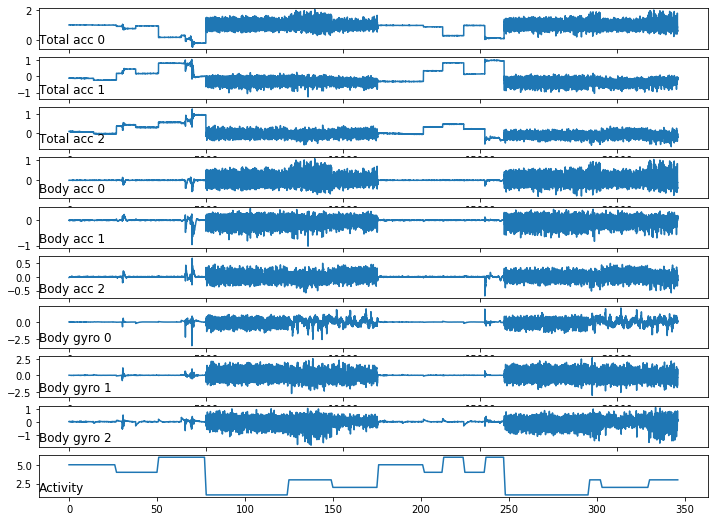

In [16]:
plot_subject(X_sub, y_sub)

## Plot histogram per subject

In [17]:
def plot_subject_histograms(X, y, sub_map, offset=0, n=10):
  plt.figure(figsize=(12, 9))
  # Get unique subjects
  subject_ids = np.unique(sub_map)
  # enumerate subjects
  for k in range(n):
    sub_id = subject_ids[k]
    # Get data for a subject
    X_sub, _ = data_for_subject(X, y, sub_map, sub_id)
    # Plot histogram of 3 dimension x, y, z
    ax = plt.subplot(n, 1, k+1)
    ax.set_xlim(-1, 1)
    for i in range(3):
      plt.hist(to_series(X_sub[:, :, offset+i]), bins=100)
      plt.yticks([])
      plt.xticks([-1, 0, 1])
  plt.show()

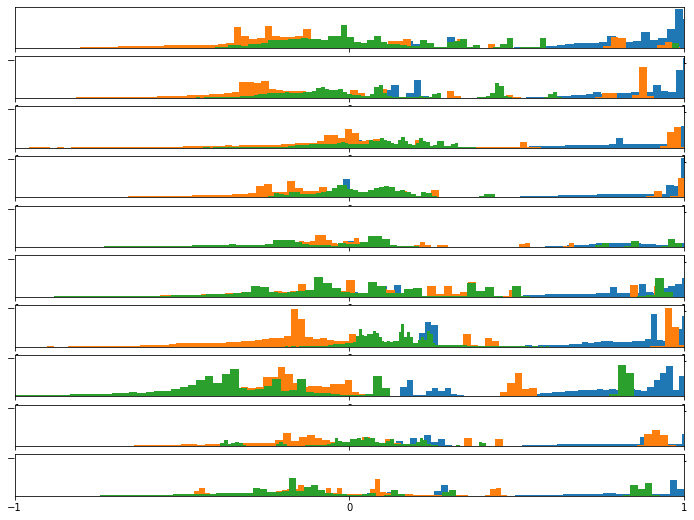

In [18]:
# Plot total acceleration (x, y, z axis) histograms for first 10 subjects
plot_subject_histograms(X_train, y_train, sub_map, offset=0)

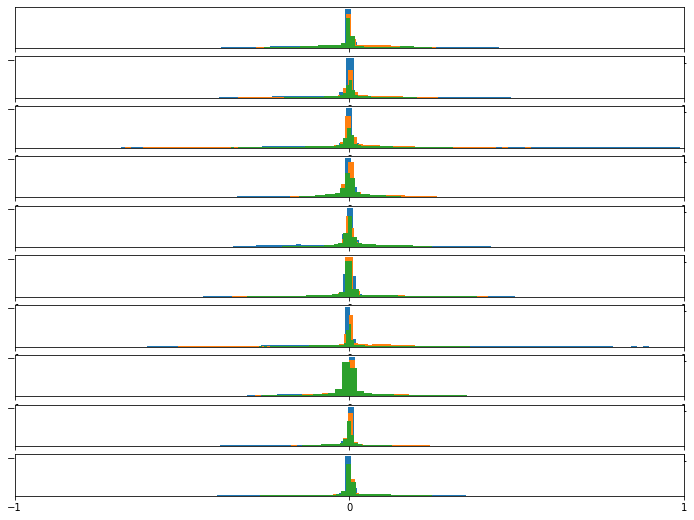

In [19]:
# Plot body acceleration (x, y, z axis) histograms for first 10 subjects
plot_subject_histograms(X_train, y_train, sub_map, offset=3)

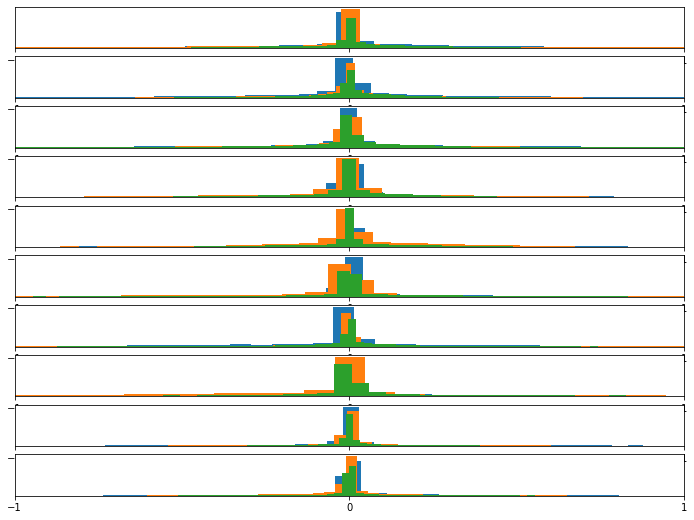

In [20]:
# Plot gyroscopic (x, y, z axis) histograms for first 10 subjects
plot_subject_histograms(X_train, y_train, sub_map, offset=6)

## Plot distribution per activity

In [21]:
# Group data by activity
def data_by_activity(X, y, activities):
  # Group windows by activity
  return {a: X[y[:, 0] == a, :, :] for a in activities}

In [25]:
def plot_activity_histogram(X, y, offset=0):
  # Get a list of unique activities for the subject
  activity_ids = np.unique(y)
  # Group windows by activity
  grouped = data_by_activity(X, y, activity_ids)
  # Plot per activity, histograms for each axis
  plt.figure(figsize=(12, 9))
  for k in range(len(activity_ids)):
    act_id = activity_ids[k]
    ax = plt.subplot(len(activity_ids), 1, k+1)
    ax.set_xlim(-1, 1)
    for i in range(3):
      plt.hist(to_series(grouped[act_id][:, :, offset + i]), bins=100)
      plt.title('activity' + str(act_id), y=0, loc='left')
  plt.show()

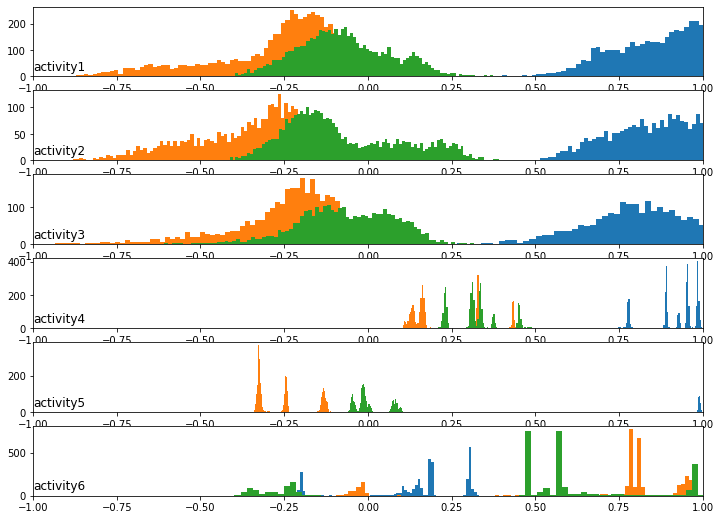

In [26]:
sub_id = train_subjects[0]
X_sub, y_sub = data_for_subject(X_train, y_train, sub_map, sub_id)
# Plot total acceleration (x, y, z axis) histograms for first each activity of a subject
plot_activity_histogram(X_sub, y_sub)

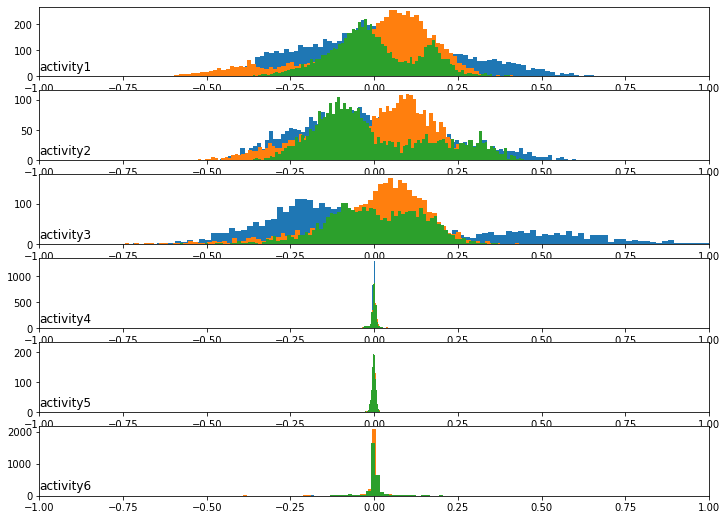

In [27]:
# Plot body acceleration (x, y, z axis) histograms for first each activity of a subject
plot_activity_histogram(X_sub, y_sub, offset=3)

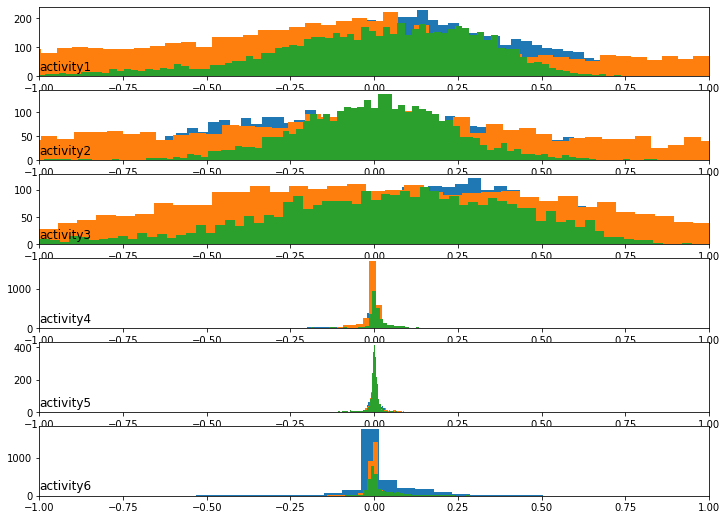

In [28]:
# Plot gyroscopic (x, y, z axis) histograms for first each activity of a subject
plot_activity_histogram(X_sub, y_sub, offset=6)

## Plot activity duration boxplot

In [35]:
def plot_activity_durations_by_subject(X, y, sub_map):
  # Get unique subjects and activities
  subject_ids = np.unique(sub_map)
  activity_ids = np.unique(y)
  # Enumerate subjects
  activity_windows = {a: list() for a in activity_ids}
  for sub_id in subject_ids:
    # Get data for one subject
    _, y_sub_j = data_for_subject(X, y, sub_map, sub_id)
    # Count windows by activity
    for a in activity_ids:
      activity_windows[a].append(len(y_sub_j[y_sub_j[:, 0] == a]))
  # Organize durations into a list of lists
  durations = [activity_windows[a] for a in activity_ids]
  plt.figure(figsize=(12, 9))
  plt.boxplot(durations, labels=activity_ids)
  plt.show()

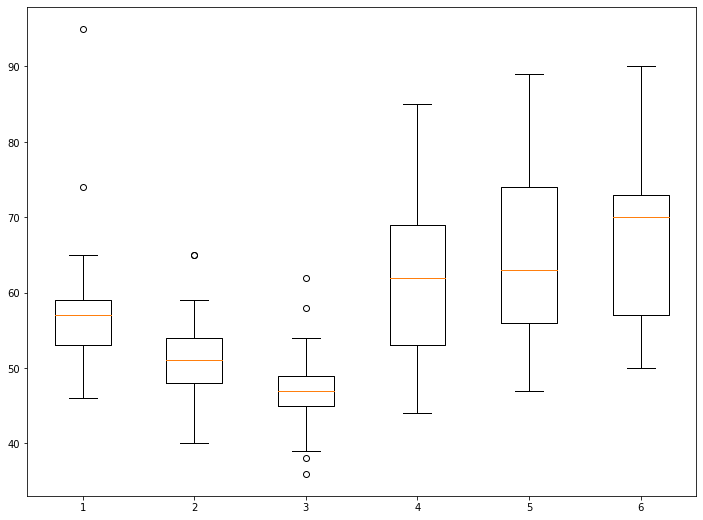

In [36]:
# Boxplot for duration of each activity according to all subjects
plot_activity_durations_by_subject(X_train, y_train, sub_map)

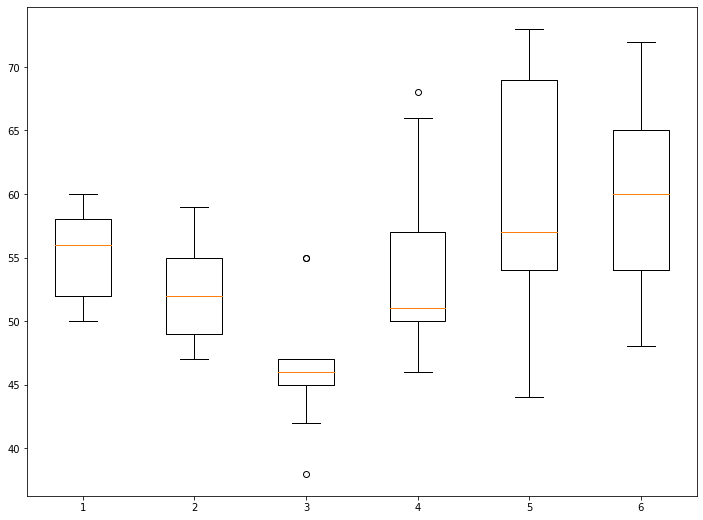

In [39]:
# Boxplot for duration of each activity according to all subjects
sub_map = load_file('HARDataset/test/subject_test.txt').values
plot_activity_durations_by_subject(X_test, y_test, sub_map)